In [37]:
# df_embedding

In [38]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer

sample_nums = list(range(0, 10001))

# convert list to dataframe
df = pd.DataFrame(sample_nums, columns=['num'])

def compile_text(x):


    text =  f"""{x['num']}
            """

    return text

sentences = df.apply(lambda x: compile_text(x), axis=1).tolist()



model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2")

output = model.encode(sentences=sentences, show_progress_bar= True, normalize_embeddings  = True)

df_embedding = pd.DataFrame(output)
df_embedding


# df_embedding.to_csv("embedding_train_roberta.csv",index = False)


Batches: 100%|██████████| 313/313 [00:02<00:00, 136.38it/s]


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.008298,0.076496,0.041092,-0.022132,-0.046114,-0.094402,0.013159,0.044419,0.040674,0.002923,...,0.016568,-0.074932,-0.028993,0.019113,0.019121,0.066916,-0.006435,0.049852,0.084831,-0.046432
1,-0.010922,0.060326,0.001107,-0.028934,-0.038366,-0.021987,0.147069,0.040760,0.085364,-0.024906,...,0.006364,-0.045830,-0.001348,0.004281,-0.059624,0.063151,0.065511,0.019580,0.096671,-0.006298
2,-0.018026,0.083925,0.004574,0.001230,-0.044095,0.007890,0.100648,0.048844,0.076118,-0.038592,...,0.022820,-0.081674,-0.021362,-0.019019,-0.089416,0.070524,0.022594,0.036145,0.058301,-0.010635
3,-0.001449,-0.039424,-0.053489,-0.071396,-0.038448,-0.028246,0.058645,-0.058034,0.028744,-0.019250,...,0.078501,-0.058937,-0.019122,-0.019880,-0.014474,0.016909,0.083563,-0.038467,0.078311,0.029485
4,0.066165,-0.030724,-0.028049,-0.072301,-0.057984,-0.027140,0.016094,-0.034227,0.040307,-0.044232,...,0.086417,-0.045798,0.007490,-0.031075,0.048652,-0.013372,0.025945,-0.011343,0.069486,-0.021769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.049401,0.051856,-0.083578,-0.018756,-0.117067,-0.086320,-0.070059,0.055428,0.071414,0.025203,...,-0.001631,-0.124429,-0.020803,-0.006640,-0.075111,0.068858,0.028887,-0.028849,-0.049230,-0.014366
9997,-0.058802,0.031099,-0.092461,-0.012804,-0.108528,-0.073329,-0.027734,0.061929,0.067246,0.032373,...,-0.005766,-0.120604,-0.024374,-0.004937,-0.081651,0.086084,0.022403,-0.038274,-0.053704,0.006166
9998,-0.063269,0.037397,-0.082500,-0.013774,-0.106209,-0.061675,-0.049524,0.059488,0.073153,0.015558,...,-0.005380,-0.128307,-0.030046,-0.005346,-0.096995,0.079042,0.039012,-0.020019,-0.051790,-0.012498
9999,-0.040084,0.035135,-0.078514,-0.020295,-0.114935,-0.065375,-0.041214,0.067412,0.077071,0.027454,...,0.005645,-0.114343,-0.030592,0.005809,-0.093290,0.064575,0.052343,-0.035996,-0.047034,-0.001536


C:\Users\Shamika Tissera\AppData\Local\Temp\ipykernel_36796\329591747.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(p_df["x"], p_df["y"], p_df["z"], s=10, cmap='viridis')


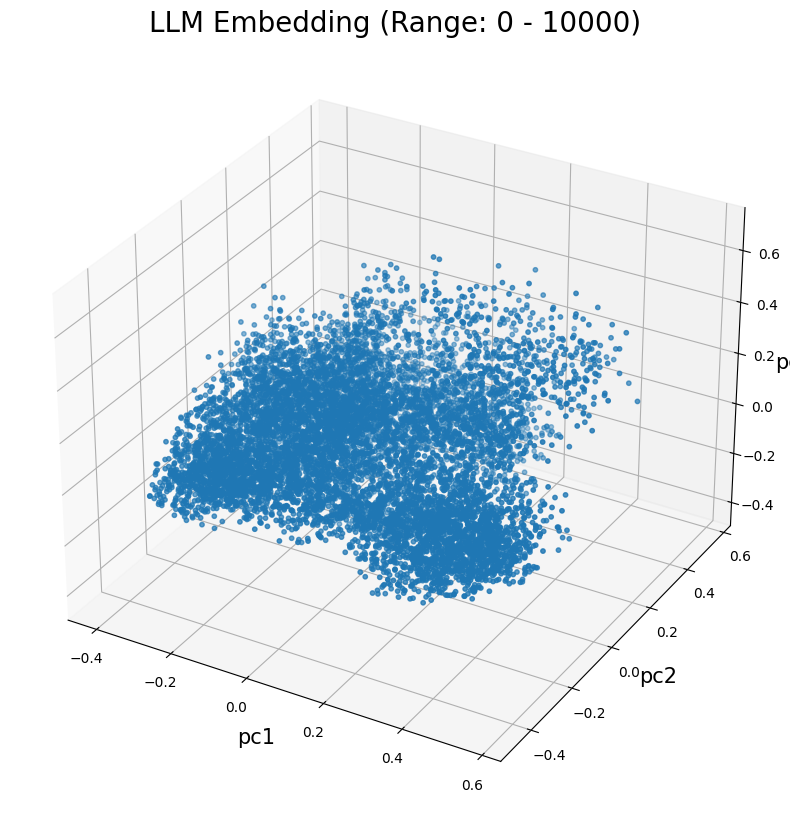

In [39]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
p_comp = pca.fit_transform(df_embedding)
p_df = pd.DataFrame(p_comp, columns=['x', 'y', 'z'])

# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("pc1", fontsize=15)
ax.set_ylabel("pc2", fontsize=15)
ax.set_zlabel("pc3", fontsize=15)
ax.set_title("LLM Embedding (Range: 0 - 10000)",fontsize=20)

ax.scatter(p_df["x"], p_df["y"], p_df["z"], s=10, cmap='viridis')
